# Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak paramenters iteratively in order to minimize a cost function.

Types of Gradient Descent:

- __Batch Gradient Descent__
- __Stochastic Gradient Descent__
- __Mini-batch Gradient Descent__

Gradient Descent does : it measures teh local gradient of the error function with regards to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

We start by filling $\theta$ with random values(random initialization) and then improve it gradually, taking one baby step at a time, each step attempting to decrease teh cost function until the algorithm converges to a minimum. 

An important paprameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the _learning rate_ is too small, which will take a long time.
If the _learning rate_ is too large, which can miss the optimal solution.

MSE cost function for a Linear Regression model happens to be a _convex function_, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve.

- That implies that there are no local minima, just one gloabl minimum.
- It is also a continuous function with a slope that never changes abruptly.

These two factors have a great consequence : Gradient Descent is guranteed to approach arbitarily close the global minimum.


__When using Gradient Descent, we should ensure that all features have a similar scale, or else it will take much longer to converge.__

Training a model means searchng for a combination of model parameters that minimizes a cost function. It is a search in the model's parameter space: the more parameters a model has the more dimensions this space has, and the harder the search is.

<br>

## Batch Gradient Descent: 
<br>
To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. This is called a _partial derivative._ 

Partial derivative of the cost function:

$$ \frac{\partial}{\partial\theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^m (\theta^T.x^{(i)}- y^{(i)}) x_j^{(i)} $$

To compute all in one go we can use below formula : 

$$\nabla_\theta MSE(\theta) = \begin{vmatrix}   
                                \frac{\partial}{\partial\theta_0} MSE(\theta) \\ 
                                \frac{\partial}{\partial\theta_1} MSE(\theta) \\ 
                                 . \\
                                 . \\
                                 . \\
                                 \frac{\partial}{\partial\theta_n} MSE(\theta)
                                \end{vmatrix}
               = \frac{2}{m}\mathbf{X}^T.(\mathbf{X}.\theta - y)$$
<br>
<br>
Above formula involves calculations over the full training set $\mathbf{X}$ at each Gradient Descent step. This is why the algorithm is called _Batch Gradient Descent_: it uses the whole batch of training data at every step. As a result it is terribly slow on large training sets. However Gradient Descent scales well with the number of features. So training a Linear Regression model when there are hundreds of features is much faster using Gradient Descent than Normal Equation.
<br>



In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
## PREVIOUS CODE -LINEAR REGRESSION USING NORMAL EQUATION
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("theta_best : ",theta_best)
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

theta_best :  [[4.21509616]
 [2.77011339]]


array([[4.21509616],
       [9.75532293]])

### Implementation of the algorithm

In [3]:

import numpy as np

eta = 0.1 # learning rate
n_iterations = 1000
m = 10

theta = np.random.randn(2,1) # random intialization


In [4]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [18]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

In [19]:
X_new_b.dot(theta)

array([[4.25214635],
       [9.83142795]])

In [20]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

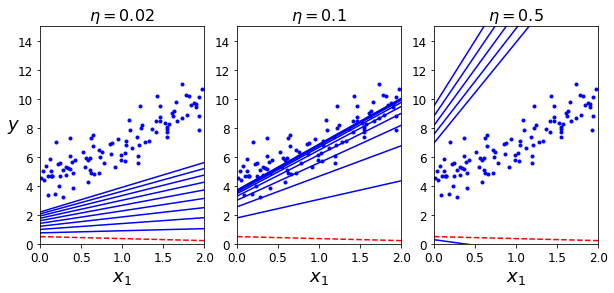

In [21]:
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

<br>
## Stochastic Gradient Descent 
<br>

The main problem with the Batch Gradient Descent is it uses the whole training set to compute the gradients at every step, which make it very slow when the training set is large. 


Stochastic Gradescent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. So this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instace needs to be in memory at each iteration.

On other hand, due to its stochastic(i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent. The cost function will bounce up and down decresing only on average age. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values ar good but not optimal.

When the cost function is very irregular this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum that Batch Gradient Descent does.

Therefore randomness is good to escape from local optima, but bad becuase it means that the algorithm can never settle at the minimum.
    One solution to it is gradually reduce the learning rate. The steps start out large then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is called _simulated annealing._ the function that determines the learning rate at each iteration is called the _learning schedule._
    
    if learning rate is reduced too quickly, you can stuck at local minimum or frozen halfway to the minimum.
    if learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution.

In [22]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

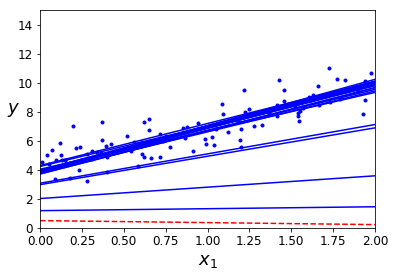

In [23]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()                                           


In [24]:
### In scikit learn SGDRegressor 
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0= 0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [25]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.23166744]), array([2.79099659]))

## Mini batch Gradient Descent 

| Type of GD | computing the gradient based on |
|-------------|-------------------|
| Batch GD. | full training set |
| Stochastic GD | just one instance |
| Mini bacth GD | small random sets of instacne | 


The main advantage of Mini batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations. The algorithm's progress in parameter space is less erratic than with SGD especially with large number f

In [26]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [27]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

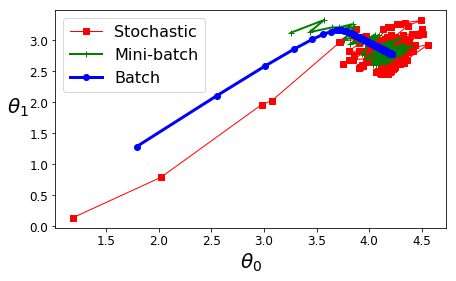

In [28]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.show()